In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_data=pd.read_csv('diabetes_prediction_dataset.csv')
raw_data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
raw_data.tail()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [4]:
raw_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
raw_data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
#checking for na values
raw_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
X=raw_data.drop(['diabetes'],axis=1)

In [8]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [9]:
Y=raw_data[['diabetes']]

In [10]:
Y.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [11]:
Y.value_counts()

diabetes
0           91500
1            8500
dtype: int64

In [12]:
X.shape

(100000, 8)

In [13]:
X['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [14]:
#import the label incoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder=LabelEncoder()

In [16]:
encoded_gender=encoder.fit_transform(X['gender'])

In [17]:
encoded_gender.size

100000

In [18]:
encoded_gender

array([0, 0, 1, ..., 1, 0, 0])

In [19]:
X['gender']=encoded_gender

In [20]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,never,25.19,6.6,140
1,0,54.0,0,0,No Info,27.32,6.6,80
2,1,28.0,0,0,never,27.32,5.7,158
3,0,36.0,0,0,current,23.45,5.0,155
4,1,76.0,1,1,current,20.14,4.8,155


In [21]:
encoded_sm_history=encoder.fit_transform(X['smoking_history'])

In [22]:
encoded_sm_history

array([4, 0, 4, ..., 3, 4, 1])

In [23]:
X['smoking_history']=encoded_sm_history

In [24]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155


In [25]:
#scaling the data
from sklearn.preprocessing import StandardScaler


In [26]:
scaler=StandardScaler()

In [27]:
X[['bmi']].max()

bmi    95.69
dtype: float64

In [28]:
X[['bmi']].min()

bmi    10.01
dtype: float64

In [29]:
X[['blood_glucose_level']].max()

blood_glucose_level    300
dtype: int64

In [30]:
X[['blood_glucose_level']]=scaler.fit_transform(X[['blood_glucose_level']])

In [31]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,0.047704
1,0,54.0,0,0,0,27.32,6.6,-1.426210
2,1,28.0,0,0,4,27.32,5.7,0.489878
3,0,36.0,0,0,1,23.45,5.0,0.416183
4,1,76.0,1,1,1,20.14,4.8,0.416183


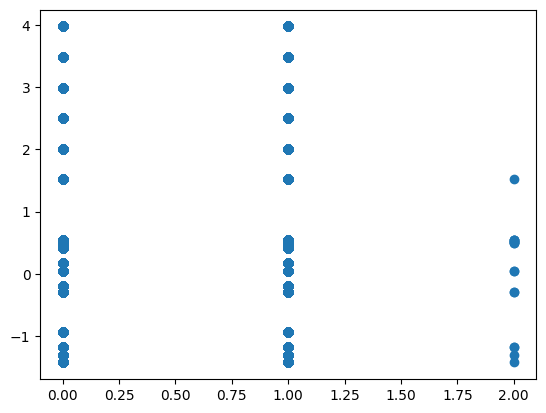

In [32]:
plt.scatter(X['gender'],X['blood_glucose_level'])
plt.show()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [35]:
x_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
33090,1,2.0,0,0,0,37.39,4.0,1.521618
14097,0,12.0,0,0,0,15.86,5.8,0.514444
41876,0,61.0,0,0,3,24.63,5.0,-1.426210
94674,0,19.0,0,0,0,27.32,4.8,-1.426210
5576,0,68.0,0,0,4,31.70,6.0,-1.180558


In [36]:
x_train.shape

(70000, 8)

In [37]:
# importing the model
from sklearn.linear_model import LinearRegression

In [38]:
model=LinearRegression()

In [39]:
model.fit(x_train,y_train)

LinearRegression()

In [40]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression()>

In [41]:
model.intercept_

array([-0.56171915])

In [42]:
model.score(x_test,y_test)

0.34424998103563853

In [43]:
#importing models from cross validation
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [44]:
svr_mode=SVC()
li_model=LinearRegression()
lo_model=LogisticRegression()
d_model=DecisionTreeRegressor()

In [45]:
lo_model.fit(x_train,y_train)
lo_model.score(x_test,y_test)

C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9596333333333333

In [46]:
d_model.fit(x_train,y_train)
d_model.score(x_test,y_test)

0.35449159872653313

In [47]:
from sklearn.model_selection import KFold

In [48]:
kf=KFold(n_splits=10)

In [49]:
for train_index,test_index in kf.split(X,Y):
    print(train_index,test_index)

[10000 10001 10002 ... 99997 99998 99999] [   0    1    2 ... 9997 9998 9999]
[    0     1     2 ... 99997 99998 99999] [10000 10001 10002 ... 19997 19998 19999]
[    0     1     2 ... 99997 99998 99999] [20000 20001 20002 ... 29997 29998 29999]
[    0     1     2 ... 99997 99998 99999] [30000 30001 30002 ... 39997 39998 39999]
[    0     1     2 ... 99997 99998 99999] [40000 40001 40002 ... 49997 49998 49999]
[    0     1     2 ... 99997 99998 99999] [50000 50001 50002 ... 59997 59998 59999]
[    0     1     2 ... 99997 99998 99999] [60000 60001 60002 ... 69997 69998 69999]
[    0     1     2 ... 99997 99998 99999] [70000 70001 70002 ... 79997 79998 79999]
[    0     1     2 ... 99997 99998 99999] [80000 80001 80002 ... 89997 89998 89999]
[    0     1     2 ... 89997 89998 89999] [90000 90001 90002 ... 99997 99998 99999]


In [50]:
def get_socre(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain)
    return model.score(xtest,ytest)

In [51]:
get_socre(li_model,x_train,x_test,y_train,y_test)

0.34424998103563853

In [52]:
from sklearn.model_selection import StratifiedKFold

In [53]:
folds=StratifiedKFold(n_splits=10)

In [54]:
from sklearn.model_selection import cross_val_score


In [55]:
cross_val_score(li_model,X,Y,cv=10).mean()

0.3481326680403926

In [56]:
cross_val_score(lo_model,X,Y,cv=10).mean()

C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: 

0.95999

In [57]:
cross_val_score(d_model,X,Y,cv=10).mean()

0.3820100866709904

since the logistic regrassion model is performing better i use that model for furtur processes

In [58]:
import pickle

In [59]:
pickle

<module 'pickle' from 'C:\\Users\\Kushan Gayantha\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\pickle.py'>

In [60]:
dir(pickle)

['ADDITEMS',
 'APPEND',
 'APPENDS',
 'BINBYTES',
 'BINBYTES8',
 'BINFLOAT',
 'BINGET',
 'BININT',
 'BININT1',
 'BININT2',
 'BINPERSID',
 'BINPUT',
 'BINSTRING',
 'BINUNICODE',
 'BINUNICODE8',
 'BUILD',
 'BYTEARRAY8',
 'DEFAULT_PROTOCOL',
 'DICT',
 'DUP',
 'EMPTY_DICT',
 'EMPTY_LIST',
 'EMPTY_SET',
 'EMPTY_TUPLE',
 'EXT1',
 'EXT2',
 'EXT4',
 'FALSE',
 'FLOAT',
 'FRAME',
 'FROZENSET',
 'FunctionType',
 'GET',
 'GLOBAL',
 'HIGHEST_PROTOCOL',
 'INST',
 'INT',
 'LIST',
 'LONG',
 'LONG1',
 'LONG4',
 'LONG_BINGET',
 'LONG_BINPUT',
 'MARK',
 'MEMOIZE',
 'NEWFALSE',
 'NEWOBJ',
 'NEWOBJ_EX',
 'NEWTRUE',
 'NEXT_BUFFER',
 'NONE',
 'OBJ',
 'PERSID',
 'POP',
 'POP_MARK',
 'PROTO',
 'PUT',
 'PickleBuffer',
 'PickleError',
 'Pickler',
 'PicklingError',
 'PyStringMap',
 'READONLY_BUFFER',
 'REDUCE',
 'SETITEM',
 'SETITEMS',
 'SHORT_BINBYTES',
 'SHORT_BINSTRING',
 'SHORT_BINUNICODE',
 'STACK_GLOBAL',
 'STOP',
 'STRING',
 'TRUE',
 'TUPLE',
 'TUPLE1',
 'TUPLE2',
 'TUPLE3',
 'UNICODE',
 'Unpickler',
 'Unpi

In [61]:
help(pickle.dumps)

Help on built-in function dumps in module _pickle:

dumps(obj, protocol=None, *, fix_imports=True, buffer_callback=None)
    Return the pickled representation of the object as a bytes object.
    
    The optional *protocol* argument tells the pickler to use the given
    protocol; supported protocols are 0, 1, 2, 3, 4 and 5.  The default
    protocol is 4. It was introduced in Python 3.4, and is incompatible
    with previous versions.
    
    Specifying a negative protocol version selects the highest protocol
    version supported.  The higher the protocol used, the more recent the
    version of Python needed to read the pickle produced.
    
    If *fix_imports* is True and *protocol* is less than 3, pickle will
    try to map the new Python 3 names to the old module names used in
    Python 2, so that the pickle data stream is readable with Python 2.
    
    If *buffer_callback* is None (the default), buffer views are serialized
    into *file* as part of the pickle stream.  It 

In [62]:
pickle.dumps(lo_model)

b'\x80\x04\x95\xba\x03\x00\x00\x00\x00\x00\x00\x8c\x1esklearn.linear_model._logistic\x94\x8c\x12LogisticRegression\x94\x93\x94)\x81\x94}\x94(\x8c\x07penalty\x94\x8c\x02l2\x94\x8c\x04dual\x94\x89\x8c\x03tol\x94G?\x1a6\xe2\xeb\x1cC-\x8c\x01C\x94G?\xf0\x00\x00\x00\x00\x00\x00\x8c\rfit_intercept\x94\x88\x8c\x11intercept_scaling\x94K\x01\x8c\x0cclass_weight\x94N\x8c\x0crandom_state\x94N\x8c\x06solver\x94\x8c\x05lbfgs\x94\x8c\x08max_iter\x94Kd\x8c\x0bmulti_class\x94\x8c\x04auto\x94\x8c\x07verbose\x94K\x00\x8c\nwarm_start\x94\x89\x8c\x06n_jobs\x94N\x8c\x08l1_ratio\x94N\x8c\x11feature_names_in_\x94\x8c\x15numpy.core.multiarray\x94\x8c\x0c_reconstruct\x94\x93\x94\x8c\x05numpy\x94\x8c\x07ndarray\x94\x93\x94K\x00\x85\x94C\x01b\x94\x87\x94R\x94(K\x01K\x08\x85\x94h\x1b\x8c\x05dtype\x94\x93\x94\x8c\x02O8\x94\x89\x88\x87\x94R\x94(K\x03\x8c\x01|\x94NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK?t\x94b\x89]\x94(\x8c\x06gender\x94\x8c\x03age\x94\x8c\x0chypertension\x94\x8c\rheart_disease\x94\x8c\x0fsmoking_hist

In [63]:
help(pickle.dump)

Help on built-in function dump in module _pickle:

dump(obj, file, protocol=None, *, fix_imports=True, buffer_callback=None)
    Write a pickled representation of obj to the open file object file.
    
    This is equivalent to ``Pickler(file, protocol).dump(obj)``, but may
    be more efficient.
    
    The optional *protocol* argument tells the pickler to use the given
    protocol; supported protocols are 0, 1, 2, 3, 4 and 5.  The default
    protocol is 4. It was introduced in Python 3.4, and is incompatible
    with previous versions.
    
    Specifying a negative protocol version selects the highest protocol
    version supported.  The higher the protocol used, the more recent the
    version of Python needed to read the pickle produced.
    
    The *file* argument must have a write() method that accepts a single
    bytes argument.  It can thus be a file object opened for binary
    writing, an io.BytesIO instance, or any other custom object that meets
    this interface.
   

In [64]:
pickle.dump(lo_model,'model.yml')

TypeError: file must have a 'write' attribute

In [ ]:
with open('model.yml','a') as f:
    pickle.dump(lo_model,f)
    
    

In [ ]:
X.head()

In [ ]:
X.head()

In [65]:
"hello world"

'hello world'

In [66]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,0.047704
1,0,54.0,0,0,0,27.32,6.6,-1.426210
2,1,28.0,0,0,4,27.32,5.7,0.489878
3,0,36.0,0,0,1,23.45,5.0,0.416183
4,1,76.0,1,1,1,20.14,4.8,0.416183


ImportError: cannot import name 'joblib' from 'sklearn.preprocessing' (C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [68]:
Y.head()

,diabetes
0,0
1,0
2,0
3,0
4,0


In [69]:
#importing job lib for saving the model for later use

In [70]:
from sklearn.externals import joblib

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\externals\__init__.py)

In [74]:
import sklearn.externals as ALL

In [75]:
dir(ALL)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_packaging']

In [76]:
import sklearn.externals as ALL

In [77]:
dir(ALL)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_packaging']

In [78]:
from joblib import dumps,load

ImportError: cannot import name 'dumps' from 'joblib' (C:\Users\Kushan Gayantha\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\__init__.py)

In [79]:
import joblib

In [80]:
joblib.dump(lo_model,"model.joblib")

['model.joblib']

In [81]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,0.047704
1,0,54.0,0,0,0,27.32,6.6,-1.426210
2,1,28.0,0,0,4,27.32,5.7,0.489878
3,0,36.0,0,0,1,23.45,5.0,0.416183
4,1,76.0,1,1,1,20.14,4.8,0.416183


In [90]:
X[1:3,1:3]

InvalidIndexError: (slice(1, 3, None), slice(1, 3, None))

In [92]:
X.iloc(1).name

'iloc'

In [94]:
np.array(X.iloc[1])

array([ 0.        , 54.        ,  0.        ,  0.        ,  0.        ,
       27.32      ,  6.6       , -1.42620999])

In [102]:
help(X.iloc)

Help on _iLocIndexer in module pandas.core.indexing object:

class _iLocIndexer(_LocationIndexer)
 |  Purely integer-location based indexing for selection by position.
 |  
 |  ``.iloc[]`` is primarily integer position based (from ``0`` to
 |  ``length-1`` of the axis), but may also be used with a boolean
 |  array.
 |  
 |  Allowed inputs are:
 |  
 |  - An integer, e.g. ``5``.
 |  - A list or array of integers, e.g. ``[4, 3, 0]``.
 |  - A slice object with ints, e.g. ``1:7``.
 |  - A boolean array.
 |  - A ``callable`` function with one argument (the calling Series or
 |    DataFrame) and that returns valid output for indexing (one of the above).
 |    This is useful in method chains, when you don't have a reference to the
 |    calling object, but would like to base your selection on some value.
 |  - A tuple of row and column indexes. The tuple elements consist of one of the
 |    above inputs, e.g. ``(0, 1)``.
 |  
 |  ``.iloc`` will raise ``IndexError`` if a requested indexer is
